# TITANIC COMPETITION FROM KAGGLE

This challenges aims at using Machine Leaning to create a model that predicts which passengers survived the Titanic shipwreck.

## Libraries

In [2]:
import pandas as pd 
import numpy as np 

# For vizualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from collections import Counter

# Supervised Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

## Data Exploration

In [4]:
train_df = pd.read_csv('/Users/kevinab/Desktop/Data Science/Kaggle/Titanic-Kaggle-Challenge/train.csv')
test_df = pd.read_csv('/Users/kevinab/Desktop/Data Science/Kaggle/Titanic-Kaggle-Challenge/test.csv')
combine = [train_df, test_df]

### First look at the data


Let's see which features are available in the data set.

In [9]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


We want some infos about our features like their type and the number of values available.

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

From here we see that we have different kind of features 

* Categorical : Survived (our target), Sex, Embarked
* Ordinal : PClass
* Numerical (Continous) : PassengerId, Age, Fare
* Numerical (Discrete) : SibSp, Parch
* Numerical/Alphanumerical : Ticket, Cabin
* String : Name


Another observation is that some features have missing values and thus, will require correcting. 

* Cabin > Age > Embarked features contains null values in the training dataset
* Cabin >Age are incompleted in the test dataset

In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations :

* 38% of the training dataset survived

In [17]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pickard, Mr. Berk (Berk Trembisky)",male,1601,B96 B98,S
freq,1,577,7,4,644


Observations on the categorical features :

* Names are unique 
* There are more men in our training dataset
* Ticket has some duplicated values, it means that one ticket can be for several persons
* Same for the cabins
* S port was used by most of the passengers

### Interpretation


** Feature selection **

* Ticket, PassengerId and Cabine may be dropped, they may not be correlated to Survived
* We can do some feature engineering : Adding SibSp and Parch to create a FamilySize feature, extract a Title feature from Name, create an AgeBand and FareRange features to turn numerical features into ordinal ones

** Feature importance **

* Age and Sex may be very significant in our model (Ladies and children first !)
* PClass may be also important, we can assume first class passengers had more chance of survival

** Missing values **

* It is important to fill the missing values espacially in Age since it might be an important feature.

 

### Manipulation and Vizualisation

We will explore the features and their correlation to other features. First, let's look at the correlation matrix of all the features.

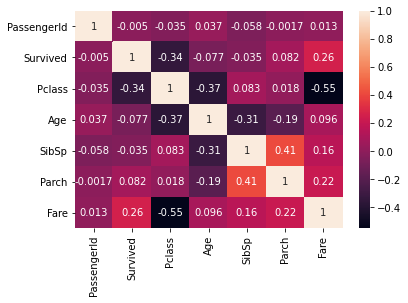

In [5]:
sns.heatmap(data=train_df.corr(), annot=True)

** Sex ** : Like we thought, women have a higher probability of survival than men.

Text(0.5, 1.0, 'Probability of Survival per Sex')

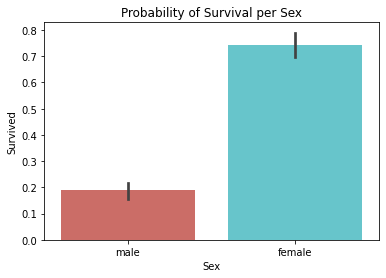

In [6]:
sns.barplot(x=train_df.Sex, y=train_df.Survived,palette='hls')
plt.title('Probability of Survival per Sex')

** Pclass ** : The probability of survival decrease with the passenger's class.

Text(0.5, 1.0, 'Probability of Survival per passenger class')

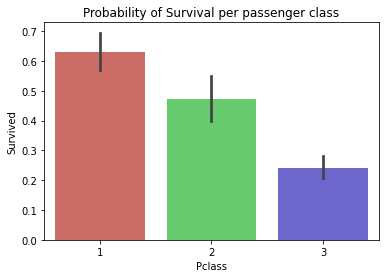

In [7]:
sns.barplot(x=train_df.Pclass,y=train_df.Survived, palette='hls')
plt.title('Probability of Survival per passenger class')

** Age ** 

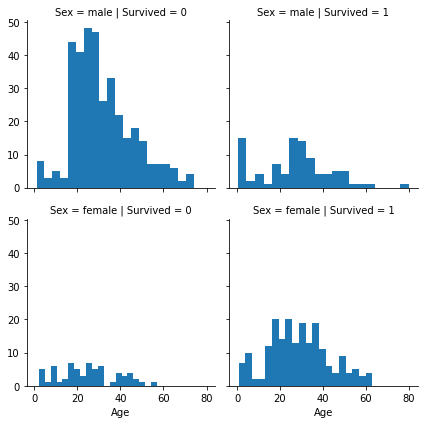

In [9]:
g=sns.FacetGrid(data=train_df,row='Sex', col='Survived')
g.map(plt.hist,'Age',bins=20)

Observations :

* Female have a high probability of survival, no matter what their Age is.
* Male infants (Age < 5) and male senior (Age=80) were more likely to be saved.

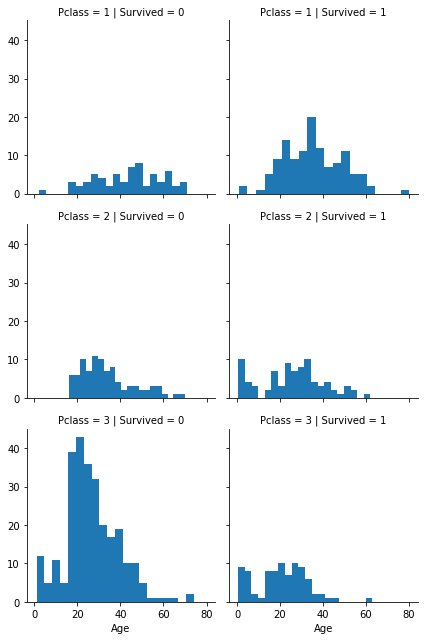

In [10]:
g = sns.FacetGrid(data=train_df, row='Pclass', col='Survived')
g.map(plt.hist,'Age', bins=20)

Text(0.5, 1.0, 'Number of passengers per class')

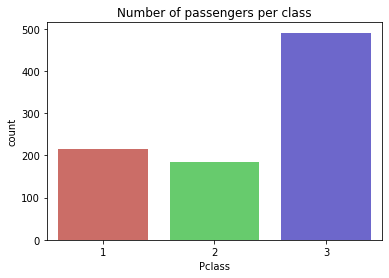

In [11]:
sns.countplot(data=train_df, x='Pclass',palette='hls')
plt.title('Number of passengers per class')

* Pclass=3 is the most represented population but has the lowest rate of survival. The rich first!
* Age seems to be crucial so we will fill the missing values like we decided earlier.


** Embarked ** : Port C have the highest probability of survival even though the great majority of the population is from port S. Certainly cause a lot of people of Pclass=3 embarked at port S.

Text(0.5, 1.0, 'Probability of Survival per Port of Embarkation and Sex')

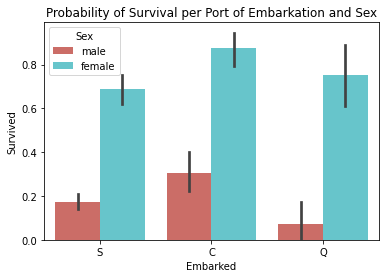

In [17]:
sns.barplot(x=train_df.Embarked, y=train_df.Survived, hue=train_df.Sex, palette='hls')
plt.title('Probability of Survival per Port of Embarkation and Sex')

Text(0.5, 1.0, 'Number of passengers per Port of Embarkation')

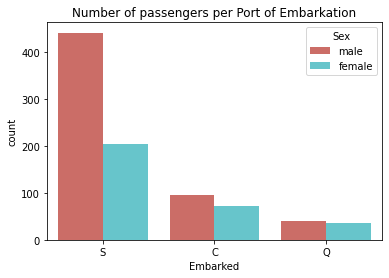

In [16]:
sns.countplot(data=train_df, x='Embarked', hue='Sex',palette='hls')
plt.title('Number of passengers per Port of Embarkation and Sex')

Family : Bigger families have less chance of survival

Text(0.5, 1.0, 'Probability of Survival per Family Size')

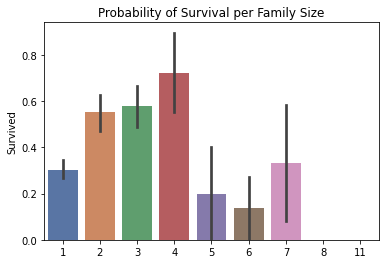

In [31]:
sns.barplot(x=train_df.SibSp+train_df.Parch+1, y=train_df.Survived, palette='deep')
plt.title('Probability of Survival per Family Size')

### Missing Values

Remember we have 2 missing values for Embarked and a lot more for Age in our training dataset. 